Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so a dataset has been created, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting, which you prefer and for what cases. 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data

### 0. Read in the data 

In [20]:
df_chicken = pd.read_csv('chicken.csv')

In [21]:
df_chicken.shape

(360, 5)

In [22]:
df_chicken.head()

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5


In [23]:
df_chicken.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    360 non-null    int64  
 1   age     360 non-null    int64  
 2   diet    360 non-null    object 
 3   weight  360 non-null    float64
 4   eggs    360 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 14.2+ KB


### 1. Weight by diet summary stats (Pandas groupby and describe)

In [17]:
df_chicken.groupby(by='diet')['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [16]:
df_chicken.groupby(by='diet')['eggs'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

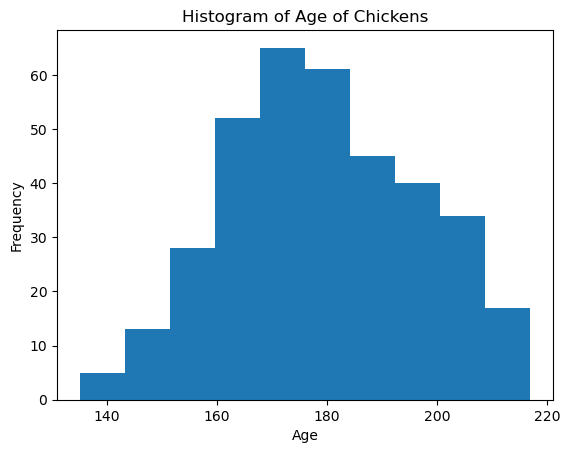

In [13]:
# df_chicken['age'].plot.hist();
df_chicken['age'].plot.hist()
plt.title('Histogram of Age of Chickens')
plt.xlabel('Age');

### 3.2 Histogram of age of chickens (Seaborn distplot())

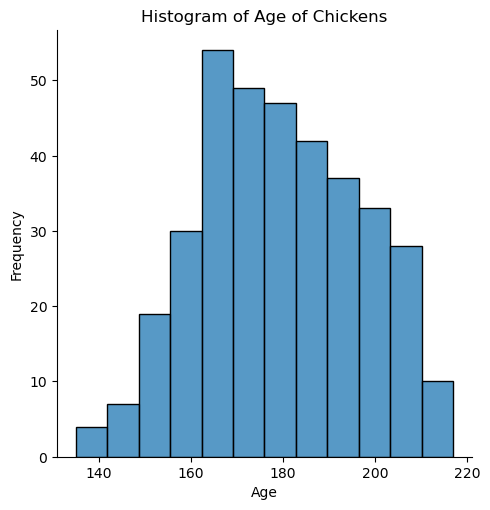

In [15]:
sns.displot(x='age', data=df_chicken)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age of Chickens');

### 4.1 Boxplot age (Pandas boxplot())

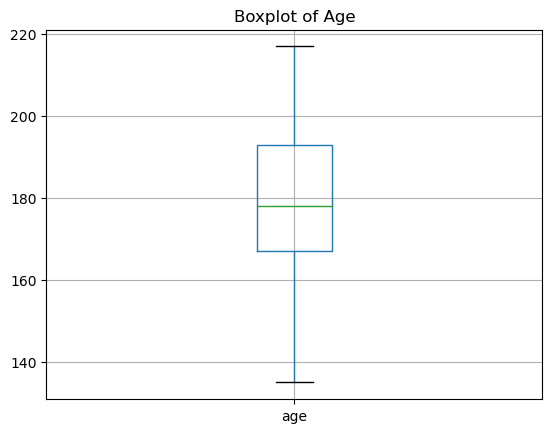

In [55]:
ax = df_chicken.boxplot(column='age')
plt.title('Boxplot of Age');

### 4.2 Boxplot age (Seaborn boxplot())

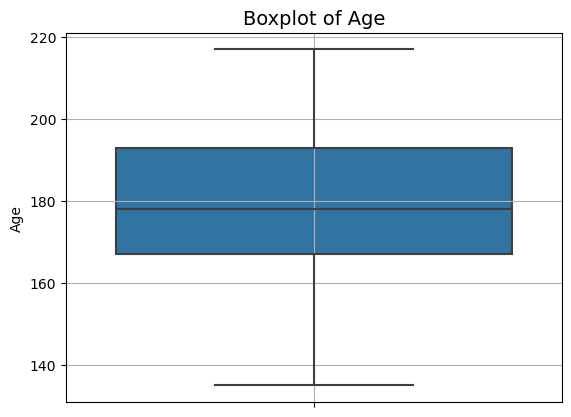

In [53]:
ax = sns.boxplot(y='age', data=df_chicken)
plt.ylabel('Age')
plt.title('Boxplot of Age', fontsize=14)
ax.grid();

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

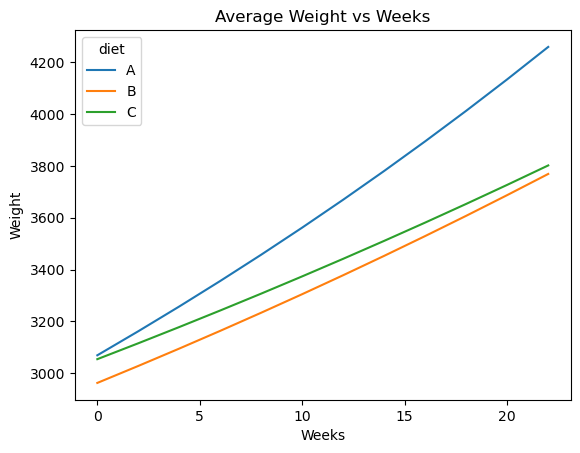

In [50]:
df_chicken.groupby(by=['week', 'diet']).mean()['weight'].unstack().plot()
plt.ylabel('Weight')
plt.xlabel('Weeks')
plt.title('Average Weight vs Weeks');

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

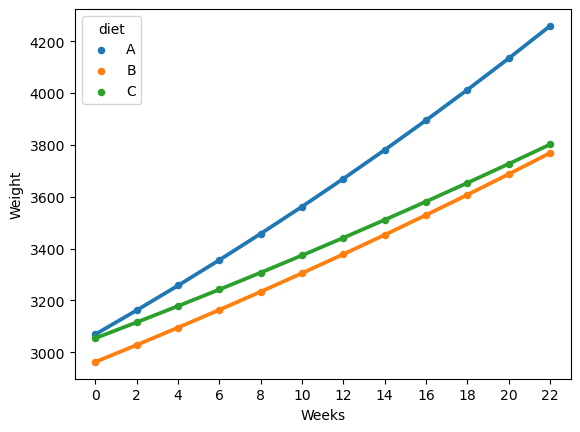

In [51]:
# ci=None is depreciated, using errorbar=None
sns.pointplot(x='week', y='weight', hue='diet', data=df_chicken, errorbar=None, markers='.')
plt.xlabel('Weeks')
plt.ylabel('Weight');

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

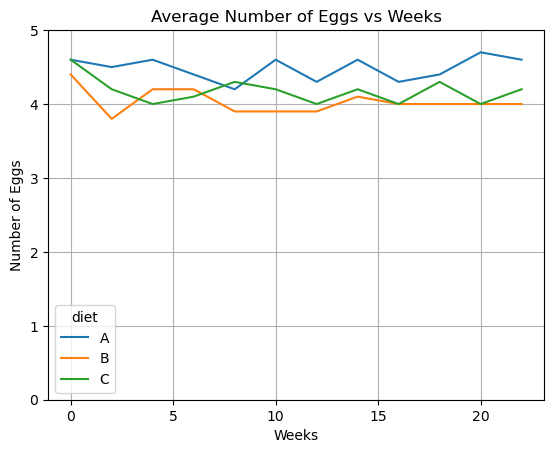

In [63]:
ax = df_chicken.groupby(by=['week', 'diet']).eggs.mean().unstack().plot()
plt.ylabel('Number of Eggs')
plt.xlabel('Weeks')
plt.title('Average Number of Eggs vs Weeks')
plt.ylim(0, 5)
ax.grid();

### 6.2 Plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

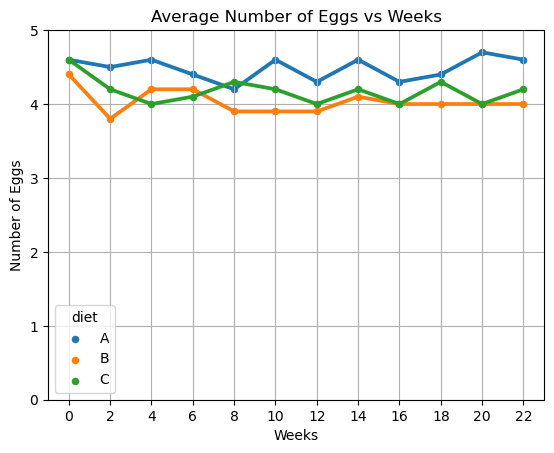

In [67]:
ax = sns.pointplot(x='week', y='eggs', hue='diet', data=df_chicken, errorbar=None, markers='.')
plt.ylabel('Number of Eggs')
plt.xlabel('Weeks')
plt.title('Average Number of Eggs vs Weeks')
plt.ylim(0, 5)
ax.grid();

### 7. Average age by diet stats (Pandas groupby())

In [73]:
df_chicken.groupby(by='diet').mean()

,week,age,weight,eggs
diet,,,,
A,11.0,166.5,3634.852500,4.483333
B,11.0,187.9,3351.299167,4.033333
C,11.0,183.4,3415.831667,4.175000


### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


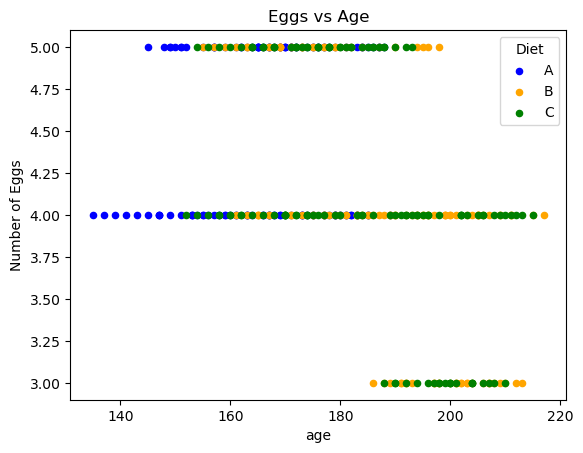

In [82]:
colors= {'A': 'blue', 'B': 'orange', 'C': 'green'}
for diet, group in df_chicken.groupby('diet'):
    group.plot(ax=plt.gca(), kind='scatter', x='age', y='eggs', label=diet, color=colors[diet])

plt.ylabel('Number of Eggs')
plt.title('Eggs vs Age')
plt.legend(title='Diet');

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


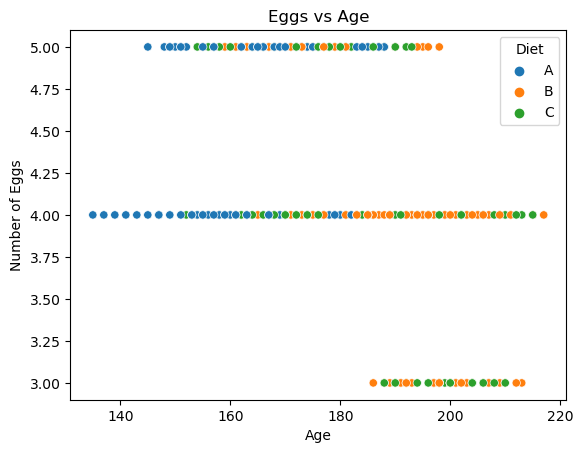

In [81]:
df_eggs = df_chicken.groupby('diet').mean()
ax = sns.scatterplot(x='age', y='eggs', hue='diet', data=df_chicken)
plt.ylabel('Number of Eggs')
plt.xlabel('Age')
plt.title('Eggs vs Age')
plt.legend(title='Diet');

### 9.1 Boxplot age by diet (Pandas boxplot())

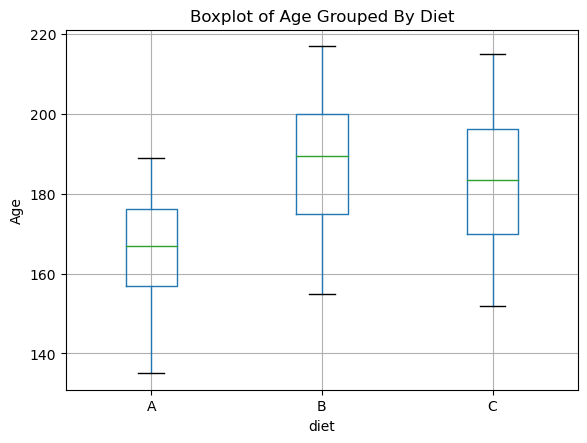

In [80]:
ax = df_chicken.boxplot(column='age', by='diet')
plt.title('Boxplot of Age Grouped By Diet')
plt.suptitle('')
plt.ylabel('Age');

### 9.2 Boxplot age by diet (Seaborn boxplot())

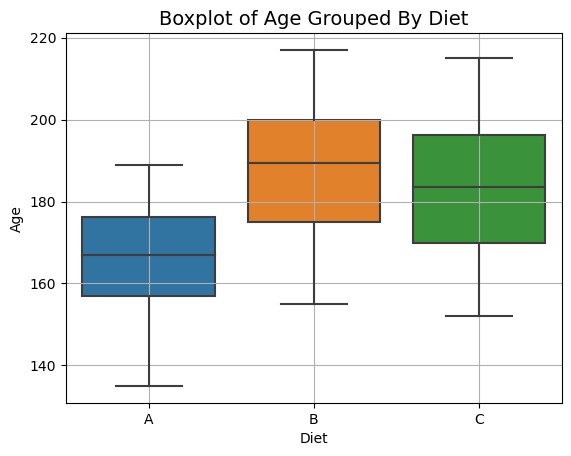

In [83]:
ax = sns.boxplot(x='diet', y='age', data=df_chicken)
plt.xlabel('Diet')
plt.ylabel('Age')
plt.title('Boxplot of Age Grouped By Diet', fontsize=14)
ax.grid();

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when would you use Seaborn?

**Your answers can go here:**






